In [96]:
import bagpy
import numpy as np
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
from matplotlib import rc
import statistics
rc('text', usetex=False) 


# Bag plotting 

In next cell give the full path relative to this jupyter notebook script as a bag name. If bag is located in the same folder as this script, you can just add `bag_name.bag` as a bag namev variable. 

After defining bag_name variable you can call `bagreader` method upon it. It returns `bagreader` object which enables us to easily extract topics in the form of `csv_files`. 

### Example: 
```
bag_name = my_bag.bag 
b = bagreader(bag_name)
```

In [97]:
bag = "first_box_touching_experiment.bag"

b = bagreader(bag)


[INFO]  Data folder first_box_touching_experiment already exists. Not creating.


## Get topics 

On your `bagreader` `b` object call `get_topics` as follows: 

```
csv_files = get_topics(b)
``` 


Call `print csv_files` to see which topics are recorded. 

In [98]:
def get_topics(b):
    csv_files = []
    for topic in b.topics:
        #print(topic)
        data = b.message_by_topic(topic)
        csv_files.append(data)
    return csv_files

In [99]:
csv_files = get_topics(b)

print(csv_files)

upper_body_3d = pd.read_csv(csv_files[-1])
right_arm = pd.read_csv(csv_files[-2])
left_arm = pd.read_csv(csv_files[-3])
cart_right_arm = pd.read_csv(csv_files[1])
cart_left_arm = pd.read_csv(csv_files[0])

['first_box_touching_experiment/cart_left_arm.csv', 'first_box_touching_experiment/cart_right_arm.csv', 'first_box_touching_experiment/left_arm.csv', 'first_box_touching_experiment/right_arm.csv', 'first_box_touching_experiment/upper_body_3d.csv']


## Extract each topic as Pandas Dataframe 


Call `pd.read_csv` method on the element of the `csv_files` which you want to extract. 

For extracting left_arm, call following: 

`left_arm = pd.read_csv(csv_files[3])` 

Access elements as follow: 

```
t = left_arm['Time']
shoulder_pitch = left_arm['shoulder_pitch']
```

In [100]:
#print(upper_body_3d)
#print(left_arm)
print(cart_left_arm)

              Time  header.seq  header.stamp.secs  header.stamp.nsecs  \
0     1.676487e+09           1         1676486959           528058052   
1     1.676487e+09           2         1676486959           565361022   
2     1.676487e+09           3         1676486959           605719089   
3     1.676487e+09           4         1676486959           646498918   
4     1.676487e+09           5         1676486959           686414003   
...            ...         ...                ...                 ...   
9749  1.676487e+09        9750         1676487349           492063045   
9750  1.676487e+09        9751         1676487349           525909900   
9751  1.676487e+09        9752         1676487349           567012071   
9752  1.676487e+09        9753         1676487349           606365919   
9753  1.676487e+09        9754         1676487349           645731925   

      header.frame_id  positionEE.x  positionEE.y  positionEE.z  velocityEE.x  \
0                 NaN      0.021935      0

## Plot ARMS

x_var: 0.004793636201394978
y_var: 0.0017688908513194077
z_var: 0.0054643510224314075
x_var: 0.004793636201394978
y_var: 0.0017688908513194077
z_var: 0.0054643510224314075


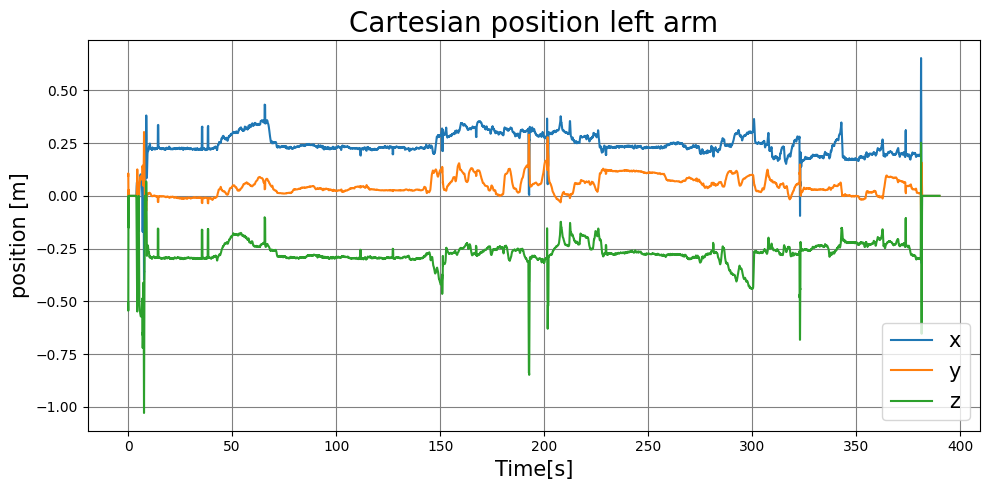

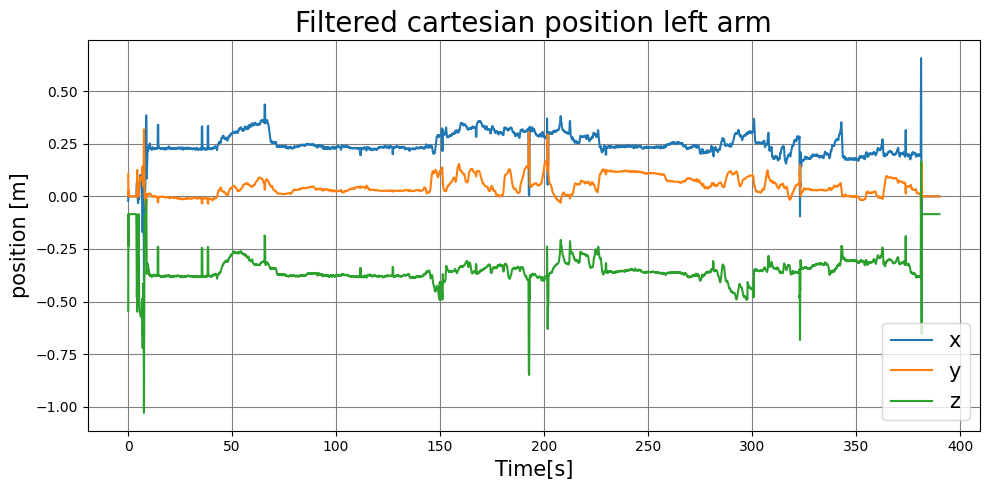

In [118]:
def scale_any_time(time):    
    scaled_time = pd.Series([t - time[0] for t in time])    
    return scaled_time


def plot_arm(arm, savename, title="left_arm"): 
    
        
    w, h = 10, 5
    
    plt.figure(figsize=(w, h))
    
    scaled_t = scale_any_time(arm["Time"])
    s_pitch = arm["shoulder_pitch.data"]
    s_roll = arm["shoulder_roll.data"]
    s_yaw = arm["shoulder_yaw.data"]
    e = arm["elbow.data"]

    
    plt.plot(scaled_t, s_pitch, label="s_pitch", linewidth=2)
    #plt.plot(jst, m_pitch, label="m_pitch")
    plt.plot(scaled_t, s_roll, label="s_roll", linewidth=2)
    #plt.plot(jst, m_roll, label="m_roll")
    plt.plot(scaled_t, s_yaw, label="s_yaw", linewidth=2)
    #plt.plot(jst, m_yaw, label="m_yaw")
    plt.plot(scaled_t, e, label="elbow", linewidth=2)
    #plt.plot(jst, m_e, label="elbow")
    
    plt.grid(color="grey")
    plt.title("{}".format(title), fontsize=20)
    plt.xlabel("Time [s]", fontsize=15)
    plt.ylabel("Angle [rad]", fontsize=15)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.savefig(savename)
    
def plot_position(arm, savename, title, filter_): 
    
    w, h = 10, 5
    
    plt.figure(figsize=(w, h))
    t = scale_any_time(arm["Time"])
    
    x = arm["positionEE.x"]
    y = arm["positionEE.y"]
    z = arm["positionEE.z"]
    x_var = statistics.pvariance(x)
    y_var = statistics.pvariance(y)
    z_var = statistics.pvariance(z)
    print("x_var: {}".format(x_var))
    print("y_var: {}".format(y_var))
    print("z_var: {}".format(z_var))

    if filter_:
        t = t[1:]
        x = filter_data(x, 3)
        y = filter_data(y, 3)
        z = filter_data(z, 3)

    plt.plot(t, x, label="x")
    plt.plot(t, y, label="y")
    plt.plot(t, z, label="z")
    plt.grid(color="grey")
    plt.title(title, fontsize=20)
    plt.xlabel("Time[s]", fontsize=15)
    plt.ylabel("position [m]", fontsize=15)
    plt.legend(loc="best", fontsize=15)
    plt.tight_layout()
    plt.savefig(savename)
    
#plot_arm(left_arm, "larm_test.svg", "Left arm")
#plot_arm(right_arm, "rarm_test.svg", "Right arm")
plot_position(cart_left_arm, "cart_larm_test.svg", "Cartesian position left arm", False)
plot_position(cart_left_arm, "cart_filtered_larm_test.svg", "Filtered cartesian position left arm", True)

#plot_position(cart_right_arm, "cart_rarm_test.svg", "Cartesian position right arm", filter_data = False)

#TODO: Compare and average everything in the code


## Plot 

In [117]:
def filter_data(data, limit): 
    filtered_data = []
    first = True
    dt = 1/30
    
    for i in data: 
        if first:
            prev_ = i
        else: 
            if (i - prev_)/dt > limit:
                i_ = i + prev_/(limit*2)
                filtered_data.append(i_)
            else:
                filtered_data.append(i)
        first = False

        
    return filtered_data

def mean_ovt(data): 
    
    data = data[:10]
    mean_list = [0, ]
    for i in data: 
        print(i)
        mean_list.append(i)
        print(mean_list)

mean_ovt(cart_left_arm["positionEE.x"])

0.0219346213477822
[0, 0.0219346213477822]
-0.0214753682129833
[0, 0.0219346213477822, -0.0214753682129833]
-0.0
[0, 0.0219346213477822, -0.0214753682129833, -0.0]
-0.0
[0, 0.0219346213477822, -0.0214753682129833, -0.0, -0.0]
-0.0
[0, 0.0219346213477822, -0.0214753682129833, -0.0, -0.0, -0.0]
-0.0
[0, 0.0219346213477822, -0.0214753682129833, -0.0, -0.0, -0.0, -0.0]
6.56075906855553e-05
[0, 0.0219346213477822, -0.0214753682129833, -0.0, -0.0, -0.0, -0.0, 6.56075906855553e-05]
-0.0030679097447119
[0, 0.0219346213477822, -0.0214753682129833, -0.0, -0.0, -0.0, -0.0, 6.56075906855553e-05, -0.0030679097447119]
0.0
[0, 0.0219346213477822, -0.0214753682129833, -0.0, -0.0, -0.0, -0.0, 6.56075906855553e-05, -0.0030679097447119, 0.0]
0.0
[0, 0.0219346213477822, -0.0214753682129833, -0.0, -0.0, -0.0, -0.0, 6.56075906855553e-05, -0.0030679097447119, 0.0, 0.0]


In [7]:
def scale_any_time(time):    
    scaled_time = pd.Series([t - time[0] for t in time])    
    return scaled_time

#print(uav_pose)
#print(uav_pose_ref)
print(r)

def plot_uav_position(uav_pose_ref, uav_pose, r, title): 
    
        
    
    t_uav = scale_any_time(uav_pose["Time"])
    t_uav_ref = scale_any_time(uav_pose_ref["Time"])
    
    
    print(len(t_uav))
    print(len(t_uav_ref))
    
    x = uav_pose['pose.position.x']
    y = uav_pose['pose.position.y']
    z = uav_pose['pose.position.z']
    x_r = uav_pose_ref['position.x']
    y_r = uav_pose_ref['position.y']
    z_r = uav_pose_ref['position.z']
    r_x = r['x']
    r_y = r['y']
    r_z = r['z']
    t_r = scale_any_time(r['Time'])
    
    #TODO: Add r_vector as a subplot
    #TODO: Scale and crop this part
    #TODO: Use crop DF method from the manipulator plotting 
    
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

    f.tight_layout()

    ax1.plot(t_uav, x, "r", label="x_m", linewidth=2)
    ax1.plot(t_uav, y, "b", label="y_m", linewidth=2)
    ax1.plot(t_uav, z, "g", label="z_m", linewidth=2)
    ax1.plot(t_uav_ref, x_r, "r-.", label="x_cmd", linewidth=2)
    ax1.plot(t_uav_ref, y_r, "b-.", label="y_cmd", linewidth=2)
    ax1.plot(t_uav_ref, z_r, "g-.", label="z_cmd", linewidth=2)
    ax1.grid(); ax1.set_title("Position control UAV", fontsize=25); ax1.set_xlim(0, 140)
    ax1.set_ylabel("Position [m]", fontsize=20); ax1.legend(); 
    ax2.plot(t_r, r_x, "r", label="r_x", linewidth=2)
    ax2.plot(t_r, r_y, "g", label="r_y", linewidth=2)
    ax2.plot(t_r, r_z, "b", label="r_z", linewidth=2)
    ax2.grid(); ax2.set_title("r", fontsize=20); 
    ax2.set_ylabel("Position [s]", fontsize=20); ax2.set_xlabel("Time [s]", fontsize=20); ax2.set_xlim(0, 140)
    ax2.set_ylim(-0.5, 0.5); ax2.legend();
    f.savefig("{}.svg".format(title))



plot_uav_position(uav_pose_ref, uav_pose, r, title="uav_position")




NameError: name 'r' is not defined

In [ ]:
print(uav_pose)

In [7]:
def plot_upper_body_detections(upper_body1, upper_body2, title): 
    
    
    ot = scale_any_time(upper_body1["Time"])
    st = scale_any_time(upper_body2["Time"])
    
    # 1
    olsx = upper_body1["left_shoulder.x"]
    olsy = upper_body1["left_shoulder.y"]
    olsz = upper_body1["left_shoulder.z"] 
    
    slsx = upper_body2["left_shoulder.x"]
    slsy = upper_body2["left_shoulder.y"]
    slsz = upper_body2["left_shoulder.z"]    
    
    #3
    orsx = upper_body1["right_shoulder.x"]
    orsy = upper_body1["right_shoulder.y"]
    orsz = upper_body1["right_shoulder.z"]
    
    srsx = upper_body2["right_shoulder.x"]
    srsy = upper_body2["right_shoulder.y"] 
    srsz = upper_body2["right_shoulder.z"]
    
    #4
    olex = upper_body1["left_elbow.x"]
    oley = upper_body1["left_elbow.y"]
    olez = upper_body1["left_elbow.z"]
    
    slex = upper_body2["left_elbow.x"]
    sley = upper_body2["left_elbow.y"]
    slez = upper_body2["left_elbow.z"]
    
    #5
    orex = upper_body1["right_elbow.x"]
    orey = upper_body1["right_elbow.y"]
    orez = upper_body1["right_elbow.z"]
    
    srex = upper_body2["right_elbow.x"]
    srey = upper_body2["right_elbow.y"]
    srez = upper_body2["right_elbow.z"]   
    
    #6
    orwx = upper_body1["right_wrist.x"]
    orwy = upper_body1["right_wrist.y"]
    orwz = upper_body1["right_wrist.z"]
    
    srwx = upper_body2["right_wrist.x"]
    srwy = upper_body2["right_wrist.y"]
    srwz = upper_body2["right_wrist.z"]  
    
    #7
    olwx = upper_body1["left_wrist.x"]
    olwy = upper_body1["left_wrist.y"]
    olwz = upper_body1["left_wrist.z"]
    
    slwx = upper_body2["left_wrist.x"]
    slwy = upper_body2["left_wrist.y"]
    slwz = upper_body2["left_wrist.z"]
    
    f, axs = plt.subplots(3, 2, sharey=True, figsize=(15, 15))
    # left shoulder
    axs[0][0].plot(ot, olsx, "r", label="xo")
    axs[0][0].plot(ot, olsy, "b",  label="yo")
    axs[0][0].plot(ot, olsz, "g",  label="zo")
    
    axs[0][0].plot(st, slsx, "m-.", label="xs")
    axs[0][0].plot(st, slsy, "c-.",  label="ys")
    axs[0][0].plot(st, slsz, "y-.",  label="zs")
    
    
    axs[0][0].axvspan(0, 15, alpha=0.1, color='red')
    axs[0][0].axvspan(15,30, alpha=0.1, color='green')
    axs[0][0].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[0][0].legend(loc="best")
    axs[0][0].grid(); axs[0][0].set_title("Left shoulder"); axs[0][0].set_xlabel("t [s]"); axs[0][0].set_ylabel("position [m]")
    
    # right shoulder
    axs[0][1].plot(ot, orsx, "r", label="xo")
    axs[0][1].plot(ot, orsy, "b", label="yo")
    axs[0][1].plot(ot, orsz, "g", label="zo")  
    
    axs[0][1].plot(st, slsx, "m-.", linewidth=2, label="xs")
    axs[0][1].plot(st, slsy, "c-.", linewidth=2, label="ys")
    axs[0][1].plot(st, slsz, "y-.", linewidth=2, label="zs")
    
    axs[0][1].axvspan(0, 15, alpha=0.1, color='red')
    axs[0][1].axvspan(15,30, alpha=0.1, color='green')
    axs[0][1].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[0][1].legend(loc="best")
    axs[0][1].grid(); axs[0][1].set_title("Right shoulder"); axs[0][1].set_xlabel("t [s]"); 
    
    # left elbow
    axs[1][0].plot(ot, olex, "r", label="xo")
    axs[1][0].plot(ot, oley, "b", label="yo")
    axs[1][0].plot(ot, olez, "g", label="zo")
    
    axs[1][0].plot(st, slex, "m-.", linewidth=2, label="xs")
    axs[1][0].plot(st, sley, "c-.", linewidth=2, label="ys")
    axs[1][0].plot(st, slez, "y-.", linewidth=2, label="zs")
    
    axs[1][0].axvspan(0, 15, alpha=0.1, color='red')
    axs[1][0].axvspan(15,30, alpha=0.1, color='green')
    axs[1][0].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[1][0].legend(loc="best")
    axs[1][0].grid(); axs[1][0].set_title("Left elbow"); axs[1][0].set_xlabel("t [s]"); axs[1][0].set_ylabel("position [m]")
    
    # right elbow
    axs[1][1].plot(ot, orex, "r", label="xo")
    axs[1][1].plot(ot, orey, "b", label="yo")
    axs[1][1].plot(ot, orez, "g", label="zo")
    
    axs[1][1].plot(st, srex, "m-.", linewidth=2, label="xs")
    axs[1][1].plot(st, srey, "c-.", linewidth=2, label="ys")
    axs[1][1].plot(st, srez, "y-.", linewidth=2, label="zs")
    
    axs[1][1].axvspan(0, 15, alpha=0.1, color='red')
    axs[1][1].axvspan(15,30, alpha=0.1, color='green')
    axs[1][1].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[1][1].legend(loc="best")
    axs[1][1].grid(); axs[1][1].set_title("Right elbow"); axs[1][1].set_xlabel("t [s]"); axs[1][1].set_ylabel("position [m]")
    
    # left wrist
    axs[2][0].plot(ot, olwx, "r", label="xo")
    axs[2][0].plot(ot, olwy, "b", label="yo")
    axs[2][0].plot(ot, olwz, "g", label="zo")
    
    axs[2][0].plot(st, slwx, "m-.", linewidth=2, label="xs")
    axs[2][0].plot(st, slwy, "c-.", linewidth=2, label="ys")
    axs[2][0].plot(st, slwz, "y-.", linewidth=2, label="zs")
    
    axs[2][0].axvspan(0, 15, alpha=0.1, color='red')
    axs[2][0].axvspan(15,30, alpha=0.1, color='green')
    axs[2][0].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[2][0].legend(loc="best")
    axs[2][0].grid(); axs[2][0].set_title("Left wrist"); axs[2][0].set_xlabel("t [s]"); axs[2][0].set_ylabel("position [m]")
    
    # right wrist
    axs[2][1].plot(ot, orwx, "r", label="xo")
    axs[2][1].plot(ot, orwy, "b", label="yo")
    axs[2][1].plot(ot, orwz, "g", label="zo")
    
    axs[2][1].plot(st, srwx, "m-.", linewidth=2, label="xs")
    axs[2][1].plot(st, srwy, "c-.", linewidth=2, label="ys")
    axs[2][1].plot(st, srwz, "y-.", linewidth=2, label="zs")
    
    axs[2][1].axvspan(0, 15, alpha=0.1, color='red')
    axs[2][1].axvspan(15,30, alpha=0.1, color='green')
    axs[2][1].axvspan(30,40, alpha=0.1, color='blue')
    
    axs[2][1].legend(loc="best")    
    axs[2][1].grid(); axs[2][1].set_title("Right wrist"); axs[2][1].set_xlabel("t [s]"); axs[2][1].set_ylabel("position [m]")
   
    plt.tight_layout()
    plt.savefig(title)
    #ax1.plot(t, lsx)
    #ax1.plot(t, lsy)
    #ax1.plot(t, lsz)
    #ax2.plot

    
    
    
    

In [8]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

plot_upper_body_detections(upper_body_op, upper_body_sb, "hpe_comparison.svg")

NameError: name 'upper_body_op' is not defined

# Antrop arms plot


In [8]:
b = bagreader("hpe_arm_test.bag")

[INFO]  Data folder hpe_arm_test already exists. Not creating.


In [9]:
topics = get_topics(b)

In [10]:
print(topics)

['hpe_arm_test/cart_left_arm.csv', 'hpe_arm_test/cart_right_arm.csv', 'hpe_arm_test/frame.csv', 'hpe_arm_test/left_arm.csv', 'hpe_arm_test/right_arm.csv', 'hpe_arm_test/upper_body_3d.csv']


In [11]:
left_arm = pd.read_csv(topics[3])
right_arm = pd.read_csv(topics[4])

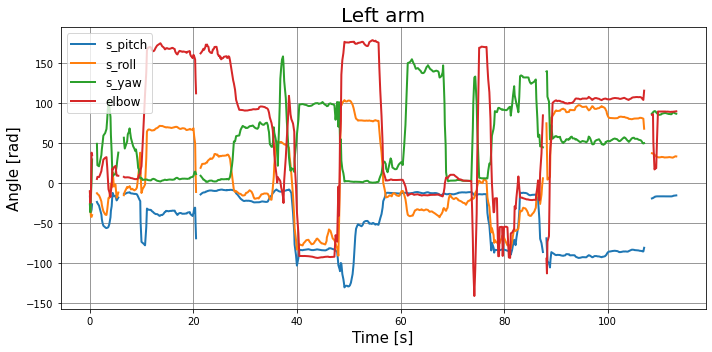

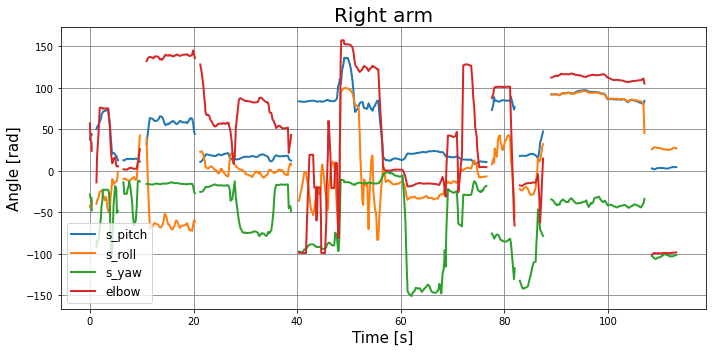

In [12]:
def plot_arm(arm, savename, title="left_arm"): 
    
    w, h = 10, 5
    
    plt.figure(figsize=(w, h))
    
    scaled_t = scale_any_time(arm["Time"])
    s_pitch = arm["shoulder_pitch.data"]
    s_roll = arm["shoulder_roll.data"]
    s_yaw = arm["shoulder_yaw.data"]
    e = arm["elbow.data"]
    
    plt.plot(scaled_t, s_pitch, label="s_pitch", linewidth=2)
    #plt.plot(jst, m_pitch, label="m_pitch")
    plt.plot(scaled_t, s_roll, label="s_roll", linewidth=2)
    #plt.plot(jst, m_roll, label="m_roll")
    plt.plot(scaled_t, s_yaw, label="s_yaw", linewidth=2)
    #plt.plot(jst, m_yaw, label="m_yaw")
    plt.plot(scaled_t, e, label="elbow", linewidth=2)
    #plt.plot(jst, m_e, label="elbow")
    
    plt.grid(color="grey")
    plt.title("{}".format(title), fontsize=20)
    plt.xlabel("Time [s]", fontsize=15)
    plt.ylabel("Angle [rad]", fontsize=15)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.savefig(savename)
    
plot_arm(left_arm, "larm_test.svg", "Left arm")
plot_arm(right_arm, "rar_mtest.svg", "Right arm")

|   t   |  lp | lr |  ly | le | rp  | rr | ry | re |
|:-----:|:---:|:--:|:---:|:--:|-----|----|----|----|
| 0-10  | 0   | 0  | 0   | 0  | 0   | 0  | 0  | 0  |
| 10-20 | 90  | 0  | 0   | 0  | 90  | 0  | 0  | 0  |
| 20-30 | 0   | 0  | 0   | 90 | 0   | 0  | 0  | 90 |
| 30-35 | 0   | 0  | -90 | 90 | 0   | 0  | 90 | 90 |
| 35-40 | 0   | 0  | 0   | 90 | 0   | 0  | 0  | 90 |
| 40-50 | 0   | 90 | 0   | 0  | 0   | 90 | 0  | 0  |
| 50-60 | 90  | 0  | 0   | 0  | 90  | 0  | 0  | 0  |
| 60-70 | 0   | 0  | 0   | 0  | 0   | 0  | 0  | 0  |
| 70-80 | -30 | 0  | 0   | 0  | -30 | 0  | 0  | 0  |

In [112]:
#print(upper_body_3d)

time = upper_body_3d["Time"]
lshoulder = np.array([upper_body_3d["left_shoulder.x"], upper_body_3d["left_shoulder.y"], upper_body_3d["left_shoulder.z"]]).T
lelbow = np.array([upper_body_3d["left_elbow.x"], upper_body_3d["left_elbow.y"], upper_body_3d["left_elbow.z"]]).T
lwrist = np.array([upper_body_3d["left_wrist.x"], upper_body_3d["left_wrist.y"], upper_body_3d["left_wrist.z"]]).T
rshoulder =  np.array([upper_body_3d["right_shoulder.x"], upper_body_3d["right_shoulder.y"], upper_body_3d["right_shoulder.z"]]).T
relbow = np.array([upper_body_3d["right_elbow.x"], upper_body_3d["right_elbow.y"], upper_body_3d["right_elbow.z"]]).T
rwrist = np.array([upper_body_3d["right_wrist.x"], upper_body_3d["right_wrist.y"], upper_body_3d["right_wrist.z"]]).T


p_se = lelbow - lshoulder
p_ew = lwrist - lelbow

p_sw = p_se + p_ew

print(p_se.shape)
print(p_ew.shape)

def get_p_se(elbow, shoulder): 
    return lelbow - shoulder

def get_p_ew(elbow, wrist): 
    return elbow - wrist 

lp_se = get_p_se(lelbow, lshoulder)
lp_ew = get_p_ew(lelbow, lwrist)
rp_se = get_p_se(relbow, rshoulder)
rp_ew = get_p_ew(relbow, rwrist)

(2001, 3)
(2001, 3)


In [113]:
def get_angle(v1, v2):
    
    angl = []
    for v1_, v2_ in zip(v1, v2): 
        d_ = np.dot(v1_, v2_)
        n1 = np.linalg.norm(v1_)
        n2 = np.linalg.norm(v2_)
        ang = np.arccos(d_/(n1 * n2))
        angl.append(ang*180/np.pi)
    
    return angl
    


In [114]:
a = get_angle(p_se, p_ew)



<ipython-input-113-558fdeaaa4c6>:8: RuntimeWarning: invalid value encountered in double_scalars
  ang = np.arccos(d_/(n1 * n2))
<ipython-input-113-558fdeaaa4c6>:8: RuntimeWarning: invalid value encountered in arccos
  ang = np.arccos(d_/(n1 * n2))


Text(0.5, 1.0, 'Comparison of angle between vectors and orthogonal projection')

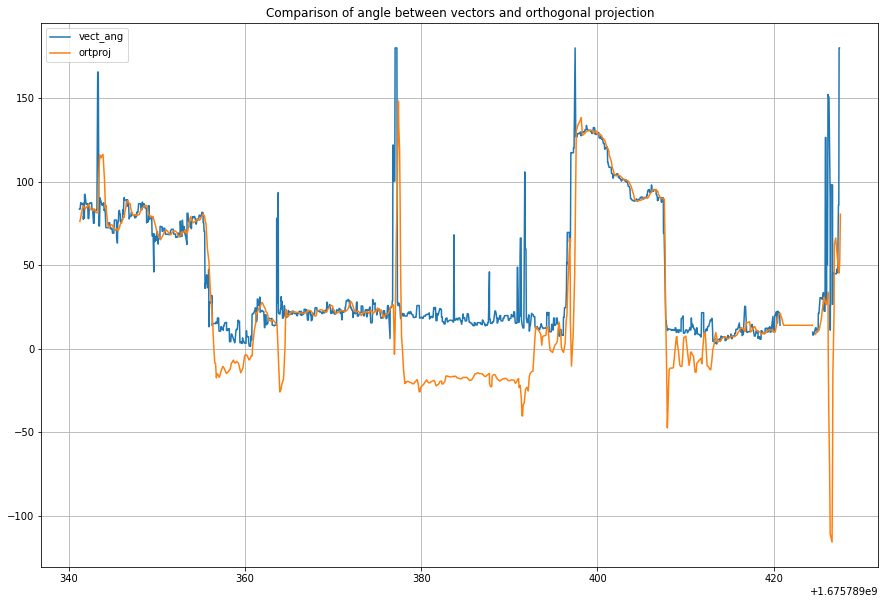

In [115]:
plt.figure(figsize=(15,10))
plt.plot(time, a, label="vect_ang")
plt.plot(left_arm["Time"],left_arm["elbow.data"], label="ortproj")
plt.legend()
plt.grid()
plt.title("Comparison of angle between vectors and orthogonal projection")

[ 0.00999999 -0.07964793 -0.22992743]
[-0.29700017  0.01773295 -0.05558572]
[-0.28700018 -0.06191498 -0.28551315]


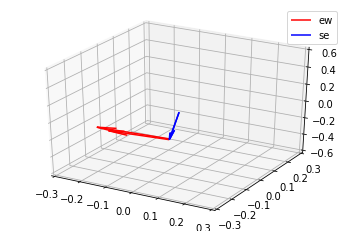

In [116]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

print(p_se[0])
print(p_ew[0])

zeros = [0, 0, 0]

v_se = zeros + p_se[0].tolist()
v_sw = p_se[0].tolist() + p_ew[0].tolist()

k = 150
v_se1 = zeros + p_se[k].tolist()
v_sw1 = p_se[k].tolist() + p_ew[k].tolist()

print(p_se[0] + p_ew[0])

soa_se = np.array([v_se, v_se1])
soa_ew = np.array([v_sw, v_sw1])

X, Y, Z, U, V, W = zip(*soa_ew)
X1, Y1, Z1, U1, V1, W1 = zip(*soa_se)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, color="red", label="ew")
ax.quiver(X1, Y1, Z1, U1, V1, W1, color="blue", label="se")
ax.set_xlim([-0.3, 0.3])
ax.set_ylim([-0.3, 0.3])
ax.set_zlim([-0.6, 0.6])
plt.legend()
plt.show()



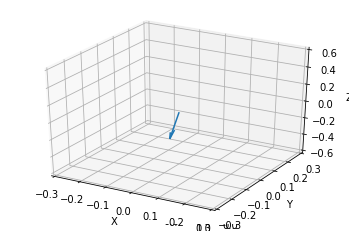

In [119]:
# https://stackoverflow.com/questions/19329039/plotting-animated-quivers-in-python


def createVect(start, p, addition=False):
    
    v_ = []
    if addition: 
        for i, k in zip(start, p): 
            v = i.tolist() + k.tolist()
            v_.append(v)
    else: 
        for i in p:
            v = start + i.tolist()
            v_.append(v)
        
    return v_


def get_3d_vect_arm(p_se, p_ew): 
    
    v_se = createVect(zeros, p_se)
    v_ew = createVect(p_se, p_ew, addition=True)
    
    return v_se, v_ew

def gen(vect, n): 
    
    yield vect[n]
    
    

lv_se, lv_ew = get_3d_vect_arm(lp_se, lp_ew)
rv_se, rv_ew = get_3d_vect_arm(rp_se, rp_ew)



fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
v_se, v_ew = get_3d_vect_arm(p_se, p_ew)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-0.3, 0.3])
ax.set_xlabel('X')
ax.set_ylim([-0.3, 0.3])
ax.set_ylabel('Y')
ax.set_zlim([-0.6, 0.6])
ax.set_zlabel('Z')
x, y, z, u, v, w = zip(v_se[0])
#x1, y1, z1, u1, v1, w1 = zip(*gen(v_ew, 350))
v = ax.quiver(x, y, z, u, v, w)
#vect1,  = ax.quiver(x, y, z, u, v, w)
plt.show()

## How to plot 3D vector data over time?! 

2001


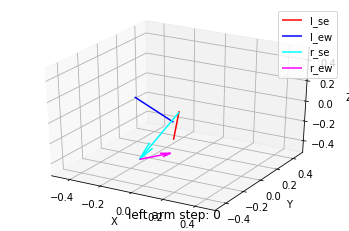

In [121]:
# https://stackoverflow.com/questions/48911643/set-uvc-equivilent-for-a-3d-quiver-plot-in-matplotlib
# https://stackoverflow.com/questions/19329039/plotting-animated-quivers-in-python

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

print(len(v_se))

num = 0
# Left arm
X1, Y1, Z1, U1, V1, W1 = lv_se[num][0], lv_se[num][1], lv_se[num][2], lv_se[num][3], lv_se[num][4], lv_se[num][5]
X2, Y2, Z2, U2, V2, W2 = lv_ew[num][0], lv_ew[num][1], lv_ew[num][2], lv_ew[num][3], lv_ew[num][4], lv_ew[num][5]

# Right arm
X3, Y3, Z3, U3, V3, W3 = rv_se[num][0], rv_se[num][1], rv_se[num][2], rv_se[num][3], rv_se[num][4], rv_se[num][5]
X4, Y4, Z4, U4, V4, W4 = rv_ew[num][0], rv_ew[num][1], rv_ew[num][2], rv_ew[num][3], rv_ew[num][4], rv_ew[num][5]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Q1 = ax.quiver(X1, Y1, Z1, U1, V1, W1, color="red", label="l_se")
Q2 = ax.quiver(X2, Y2, Z2, U2, V2, W2, color="blue", label="l_ew")
Q3 = ax.quiver(X3, Y3, Z3, U3, V3, W3, color="cyan", label="r_se")
Q4 = ax.quiver(X4, Y4, Z4, U4, V4, W4, color="magenta", label="r_ew")

ax.set_xlim(-0.5, 0.5)
ax.set_xlabel('X')
ax.set_ylim(-0.5, 0.5)
ax.set_ylabel('Y')
ax.set_zlim(-0.5, 0.5)
ax.set_zlabel('Z')
ax.legend()


def quiver_data_to_segments(X, Y, Z, u, v, w, length=1):
    
    segments = (X, Y, Z, u, v, w)
    segments = np.array(segments).reshape(6,-1)
    
    return [[[x, y, z], [u, v, w]] for x, y, z, u, v, w in zip(*list(segments))]


def update_quivers(num, vect1, vect2, Q1, Q2):
    """updates the horizontal and vertical vector components by a
    fixed increment on each frame
    """
    
    X1 = vect1[num][1]; X2 = vect2[num][0]
    Y1 = vect1[num][2]; Y2 = vect2[num][1]
    Z1 = vect1[num][3]; Z2 = vect2[num][2]
    U1 = vect1[num][3]; U2 = vect2[num][3]
    V1 = vect1[num][4]; V2 = vect2[num][4]
    W1 = vect1[num][5]; Z2 = vect2[num][5]
    
    segments1 = quiver_data_to_segments(X1, Y1, Z1, U1, V1, W1)
    segments2 = quiver_data_to_segments(X2, Y2, Z2, U2, V2, W2)
    Q1.set_segments(segments1)
    Q2.set_segments(segments2)
    ax.set_title("left arm step: {}".format(num))

    return Q1, Q2

anim = animation.FuncAnimation(fig, update_quivers, len(v_se[:500]), fargs=[v_se[:500], v_ew[:500], Q1, Q2],
                               interval=25, blit=False)
anim.save("new1.gif", writer='imagemagick',fps=10)





plt.show()

In [49]:
time = upper_body_3d["Time"]
lshoulder = np.array([upper_body_3d["left_shoulder.x"], upper_body_3d["left_shoulder.y"], upper_body_3d["left_shoulder.z"]]).T
lelbow = np.array([upper_body_3d["left_elbow.x"], upper_body_3d["left_elbow.y"], upper_body_3d["left_elbow.z"]]).T
lwrist = np.array([upper_body_3d["left_wrist.x"], upper_body_3d["left_wrist.y"], upper_body_3d["left_wrist.z"]]).T
rshoulder =  np.array([upper_body_3d["right_shoulder.x"], upper_body_3d["right_shoulder.y"], upper_body_3d["right_shoulder.z"]]).T
relbow = np.array([upper_body_3d["right_elbow.x"], upper_body_3d["right_elbow.y"], upper_body_3d["right_elbow.z"]]).T
rwrist = np.array([upper_body_3d["right_wrist.x"], upper_body_3d["right_wrist.y"], upper_body_3d["right_wrist.z"]]).T


p_se = lelbow - lshoulder
p_ew = lwrist - lelbow

p_sw = p_se + p_ew

print(p_se.shape)
print(p_ew.shape)

def get_p_se(elbow, shoulder): 
    return lelbow - shoulder

def get_p_ew(elbow, wrist): 
    return elbow - wrist 

lp_se = get_p_se(lelbow, lshoulder)
lp_ew = get_p_ew(lelbow, lwrist)
rp_se = get_p_se(relbow, rshoulder)
rp_ew = get_p_ew(relbow, rwrist)


(2001, 3)
(2001, 3)


In [103]:
def normalize(v): 
    
    norml = []
    for v_ in v: 
        normv = v_/(np.linalg.norm(v_))
    
        if np.isnan(normv).any():
            norml.append(norml[-1])
        else: 
            norml.append(normv)
    
    return np.array(norml)    

np_se = normalize(lp_se)

  

<ipython-input-103-2d35ba5aef83>:5: RuntimeWarning: invalid value encountered in true_divide
  normv = v_/(np.linalg.norm(v_))


In [125]:
def get_RPY(normed_vect):
    
    x_ = normed_vect[:, 0] # x_ = normed_vect[0]
    y_ = normed_vect[:, 1] # y_ = normed_vect[1]
    z_ = normed_vect[:, 2] # z_ = normed_vect[2]
    
    P, Y, R = [], [], []
    
    for x, y, z in zip(x_, y_, z_):
        
        Y_ = np.arctan(x/y)
        P_ = np.arccos(-z)
        
        
        n = x*np.sin(Y_)
        d = x*np.cos(Y_)*np.sin(P_) + y*np.sin(P_)+x*np.cos(P_)
        R_ = np.arctan(n/d)
        
        if np.isnan(Y_): 
            Y.append(Y[-1])
        else: 
            Y.append(Y_)
            
        if np.isnan(P_):
            P.append(P[-1])
        else: 
            P.append(P_)
            
        if np.isnan(R_):
            R.append(R[-1])
        else: 
            R.append(R_)
    
    return R, P, Y
    

In [126]:
roll, pitch, yaw = get_RPY(np_se)

print(len(pitch))
print(len(yaw))

2001
2001


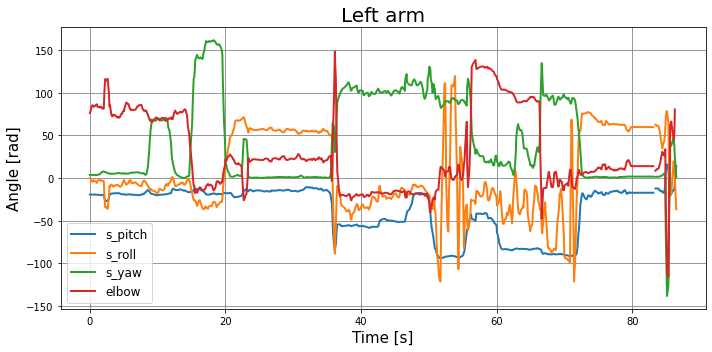

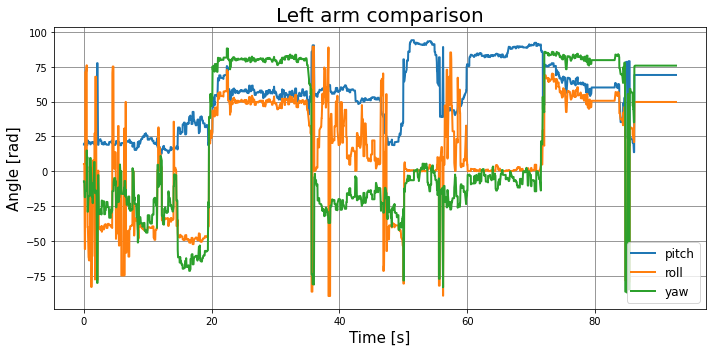

In [127]:
def plot_arm_angles(time, roll, pitch, yaw, savename, title="left_arm"): 
    
    w, h = 10, 5
    
    plt.figure(figsize=(w, h))
    
    scaled_t = scale_any_time(time)
    s_pitch = np.array(pitch)*180/np.pi
    s_roll = np.array(roll)*180/np.pi
    s_yaw = np.array(yaw)*180/np.pi
    #e = arm["elbow.data"]
    
    plt.plot(scaled_t, s_pitch, label="pitch", linewidth=2)
    #plt.plot(jst, m_pitch, label="m_pitch")
    plt.plot(scaled_t, s_roll, label="roll", linewidth=2)
    #plt.plot(jst, m_roll, label="m_roll")
    plt.plot(scaled_t, s_yaw, label="yaw", linewidth=2)
    #plt.plot(jst, m_yaw, label="m_yaw")
    #plt.plot(scaled_t, e, label="elbow", linewidth=2)
    #plt.plot(jst, m_e, label="elbow")
    
    plt.grid(color="grey")
    plt.title("{}".format(title), fontsize=20)
    plt.xlabel("Time [s]", fontsize=15)
    plt.ylabel("Angle [rad]", fontsize=15)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.savefig(savename)
    
plot_arm(left_arm, "larm_test.svg", "Left arm")
plot_arm_angles(time, roll, pitch, yaw, "larm_comp.svg", "Left arm comparison")

[1. 1. 1. ... 1. 1. 1.]


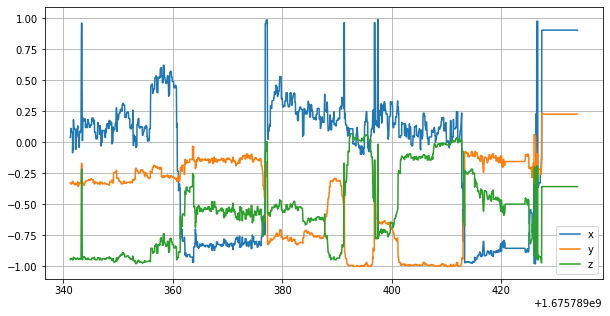

In [128]:
def plot_vect(t, x, y, z):
    
    print(np.sqrt(x**2 + y**2 + z**2))
    plt.figure(figsize=(10, 5))
    plt.plot(t, x, label="x")
    plt.plot(t, y, label="y")
    plt.plot(t, z, label="z")
    plt.grid()
    plt.legend()


plot_vect(time, np_se[:, 0], np_se[:, 1], np_se[:, 2])
    